# Assignment 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = 'UCI_data.csv'
df = pd.read_csv(file, on_bad_lines='skip')
df.head()

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
0,2016-04-19 20:30:00,22.200000,39.500000,20.566667,37.656667,22.230000,37.030000,22.318571,36.610000,20.633333,...,33.90,9.70,766.100000,65.5,3.500000,40.000000,3.350000,24.061869,24.061869,60
1,2016-03-05 04:40:00,20.356667,37.126667,17.566667,40.230000,20.890000,37.663333,18.700000,36.260000,18.463333,...,41.09,0.30,740.333333,99.0,1.000000,41.333333,0.100000,4.622052,4.622052,50
2,2016-03-14 12:40:00,20.926667,38.790000,21.100000,35.526667,21.600000,36.290000,21.000000,34.826667,18.100000,...,38.76,4.40,768.466667,72.0,6.000000,22.666667,-0.266667,5.635898,5.635898,80
3,2016-01-22 15:30:00,18.290000,38.900000,17.290000,39.260000,18.390000,39.326667,16.100000,38.790000,16.100000,...,39.20,3.35,760.600000,82.0,5.500000,41.000000,0.500000,49.216445,49.216445,40
4,2016-02-10 00:40:00,22.290000,42.333333,21.600000,40.433333,22.666667,43.363333,19.100000,40.900000,19.290000,...,43.73,3.20,738.900000,88.0,7.333333,56.000000,1.400000,47.617579,47.617579,60


In [3]:
df.dtypes

date              object
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
TARGET_energy      int64
dtype: object

In [4]:
df.shape

(19735, 28)

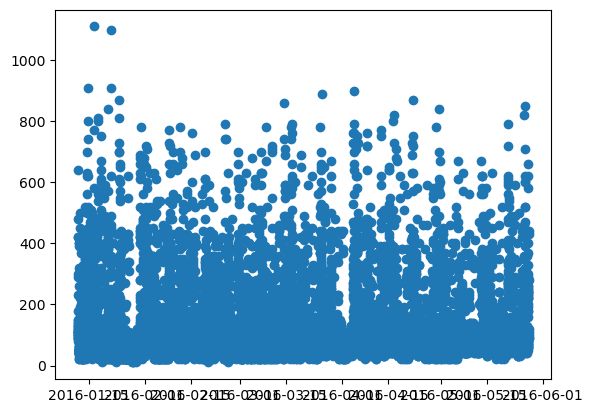

In [5]:
df['date'] = pd.to_datetime(df['date'])
plt.scatter(df['date'], df["TARGET_energy"])
plt.show()

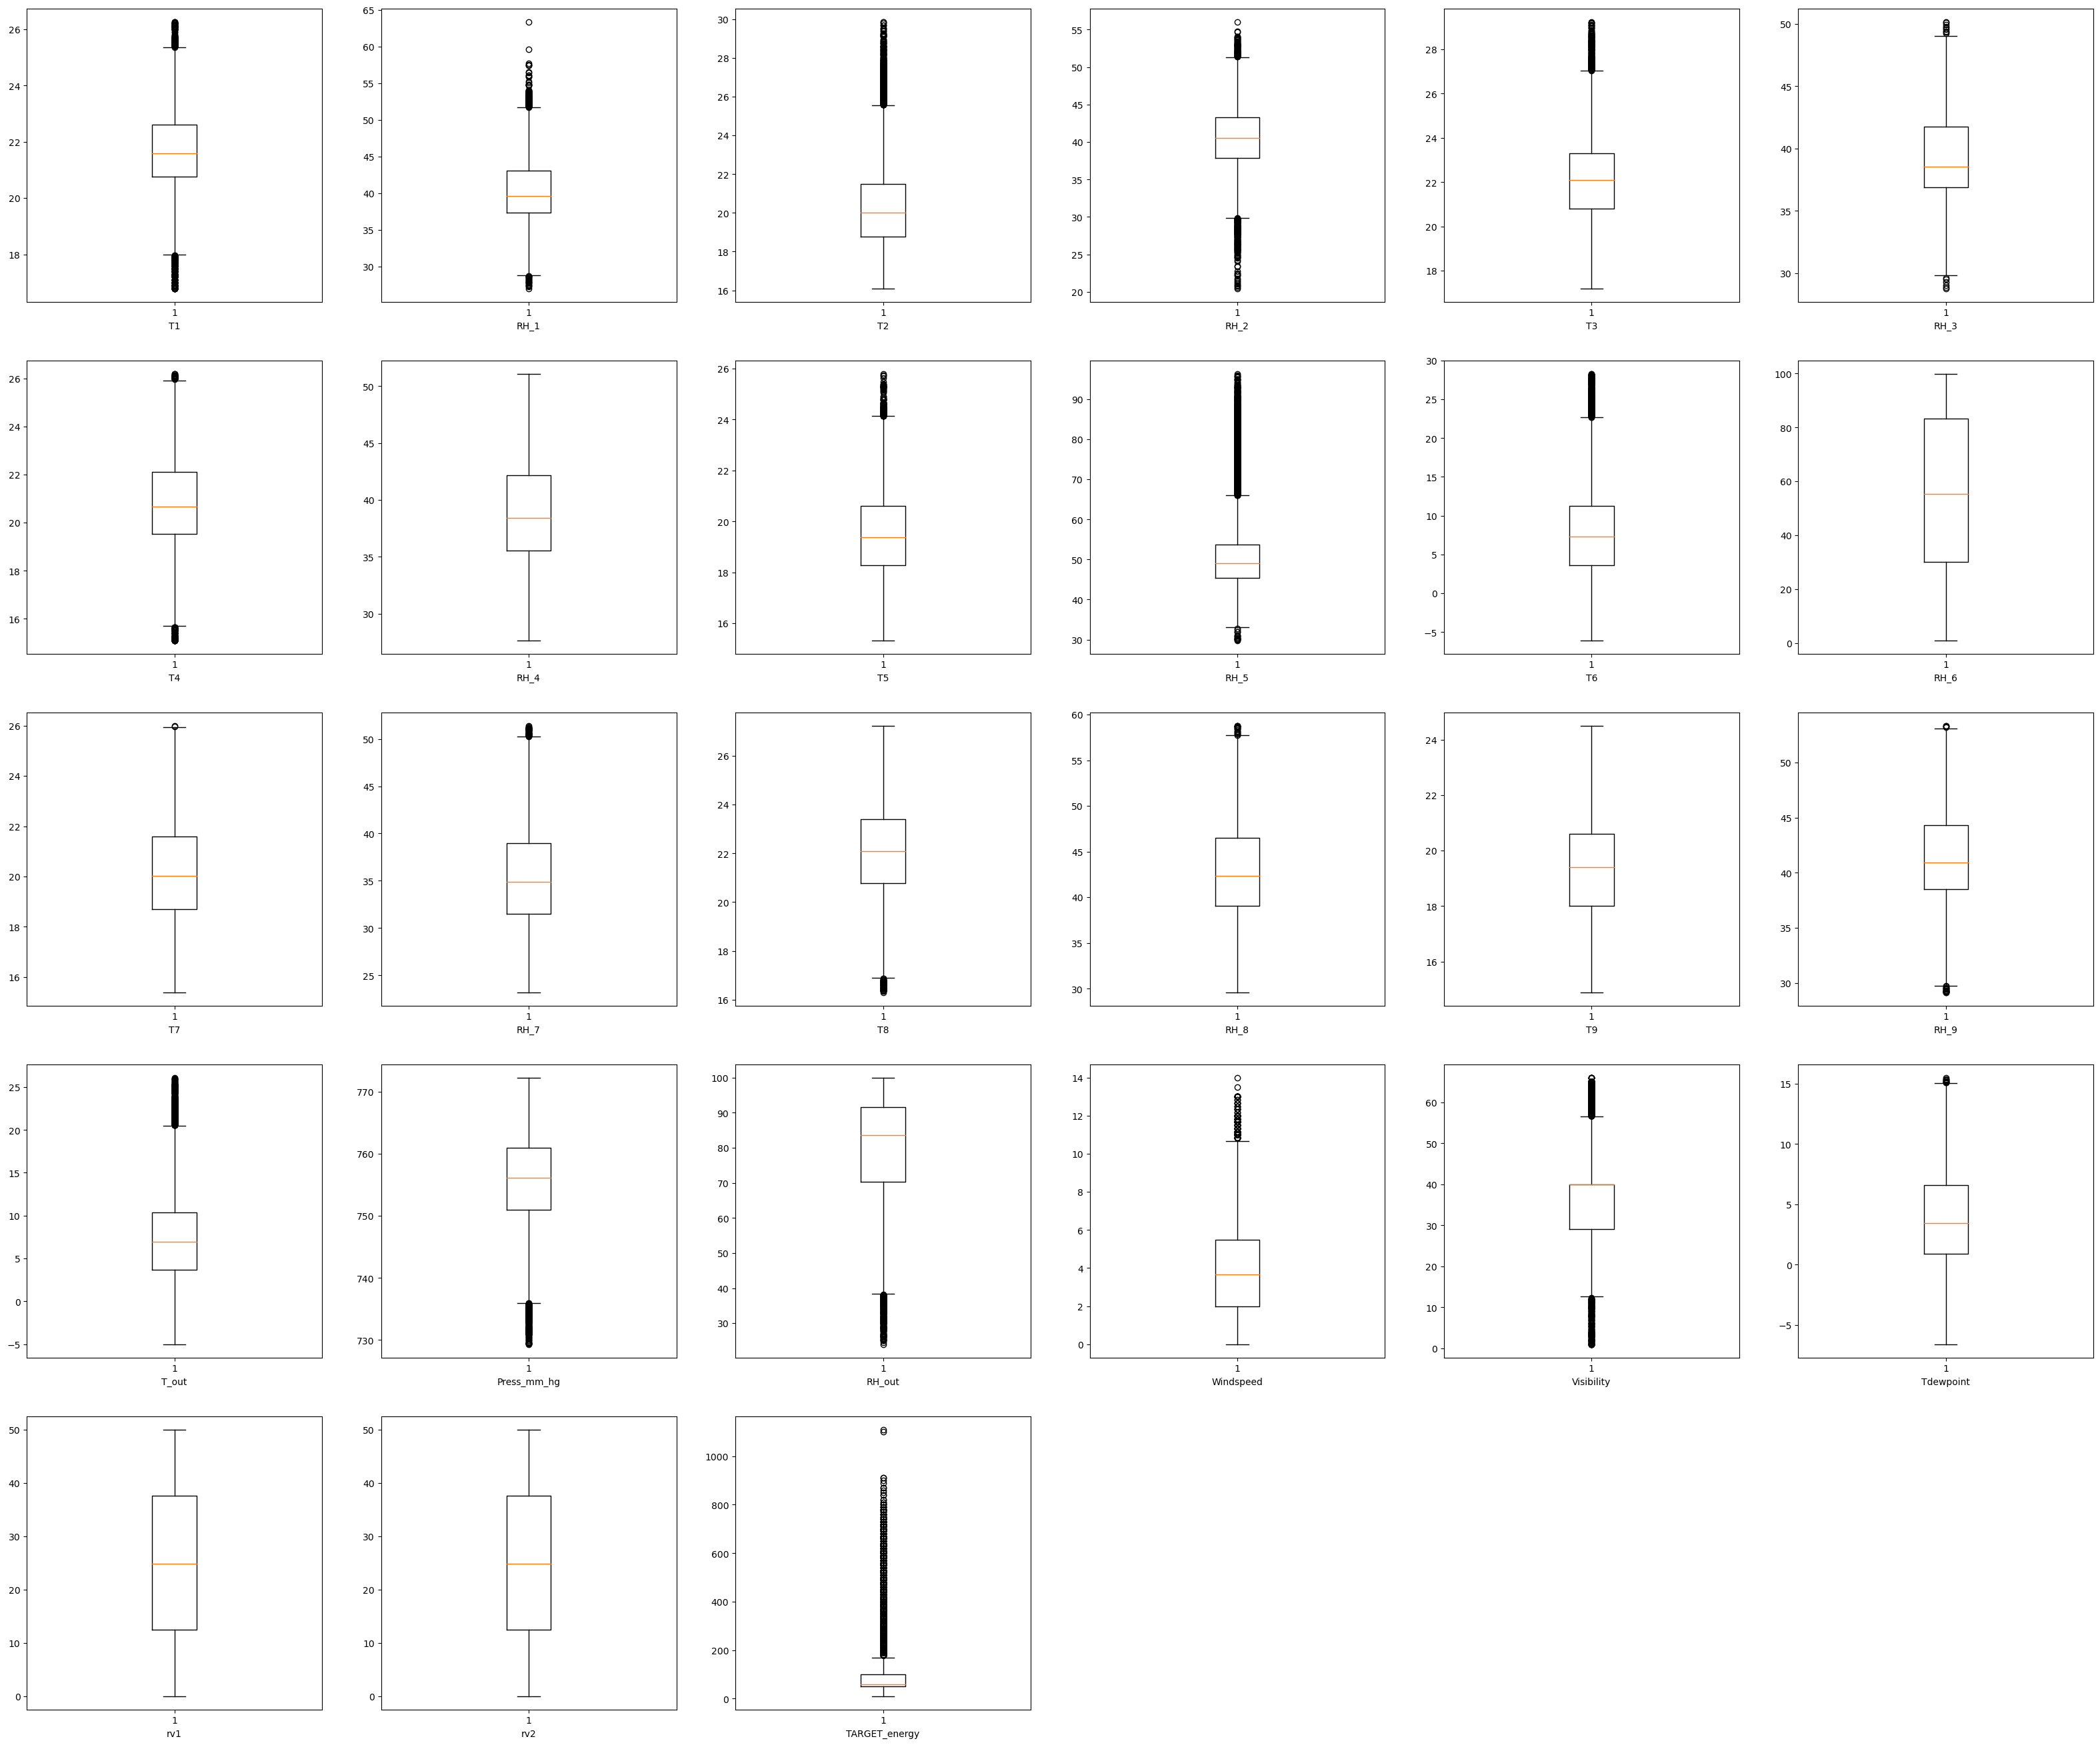

In [6]:
df = df.set_index('date')
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)  
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.show()

In [7]:
for i, col in enumerate(df.columns[:-1]):
   
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]

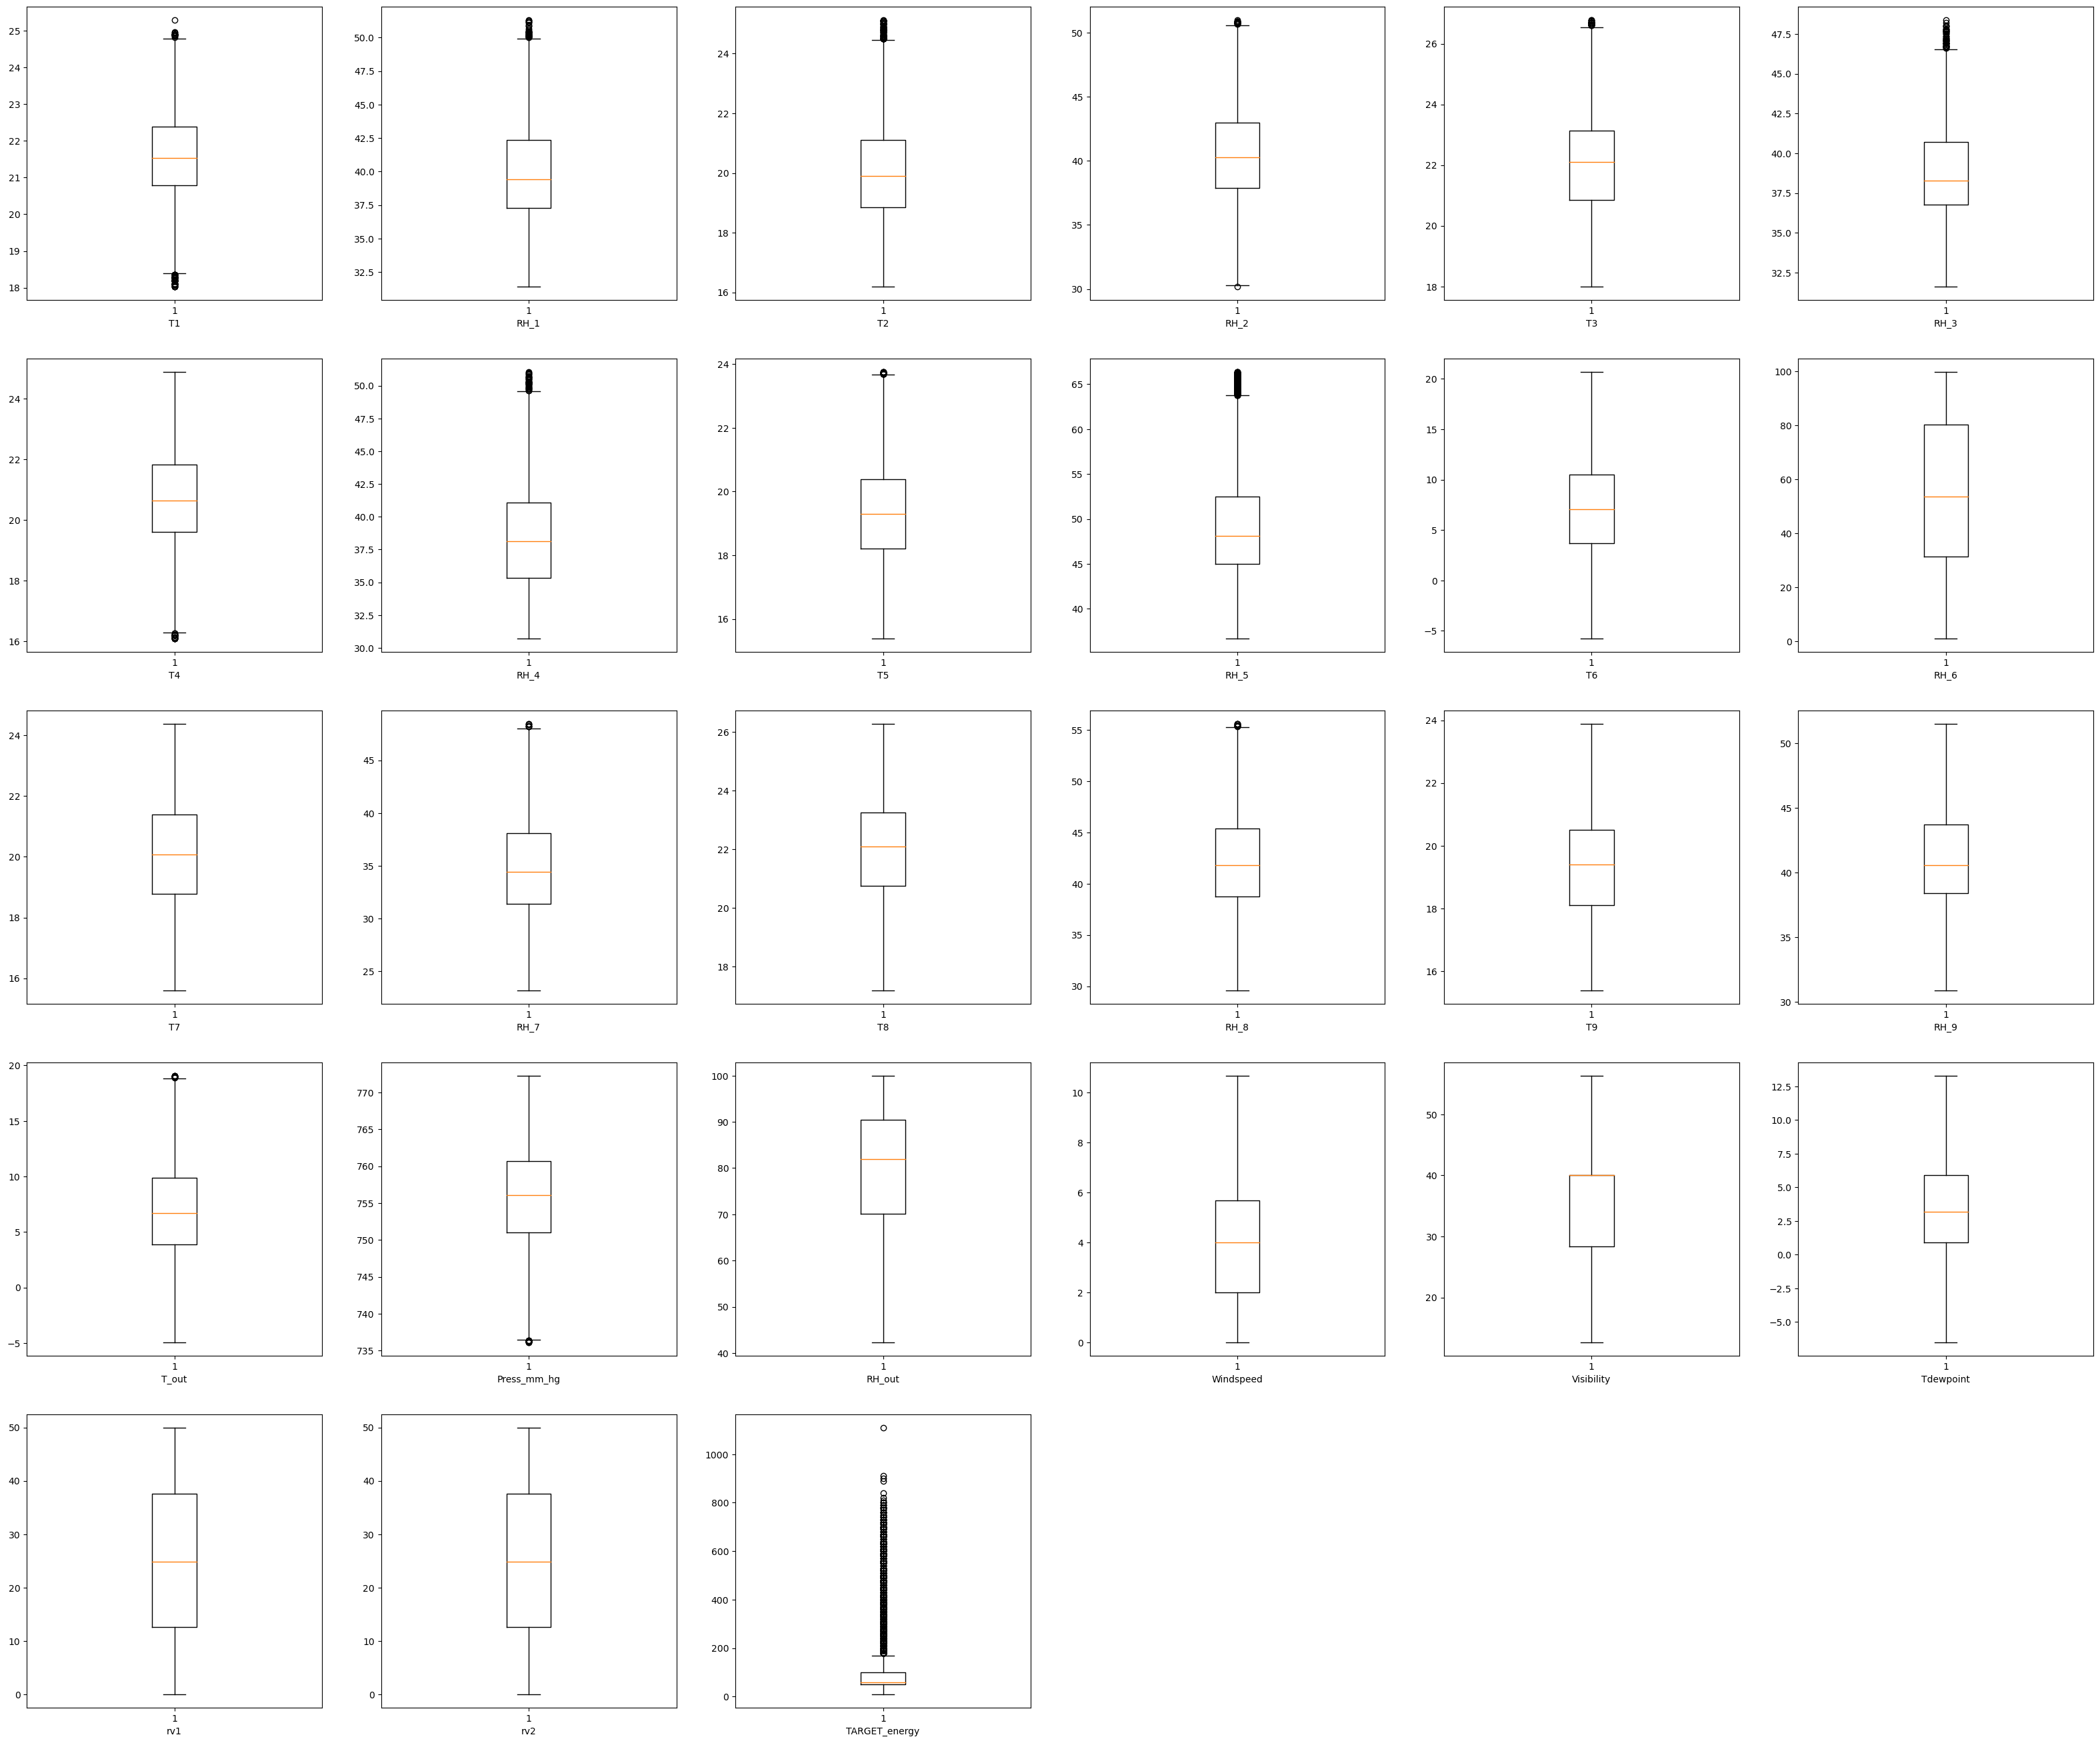

In [8]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)  
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.show()

In [9]:
df.shape

(13670, 27)

In [10]:
df.isna().sum()

T1               0
RH_1             0
T2               0
RH_2             0
T3               0
RH_3             0
T4               0
RH_4             0
T5               0
RH_5             0
T6               0
RH_6             0
T7               0
RH_7             0
T8               0
RH_8             0
T9               0
RH_9             0
T_out            0
Press_mm_hg      0
RH_out           0
Windspeed        0
Visibility       0
Tdewpoint        0
rv1              0
rv2              0
TARGET_energy    0
dtype: int64

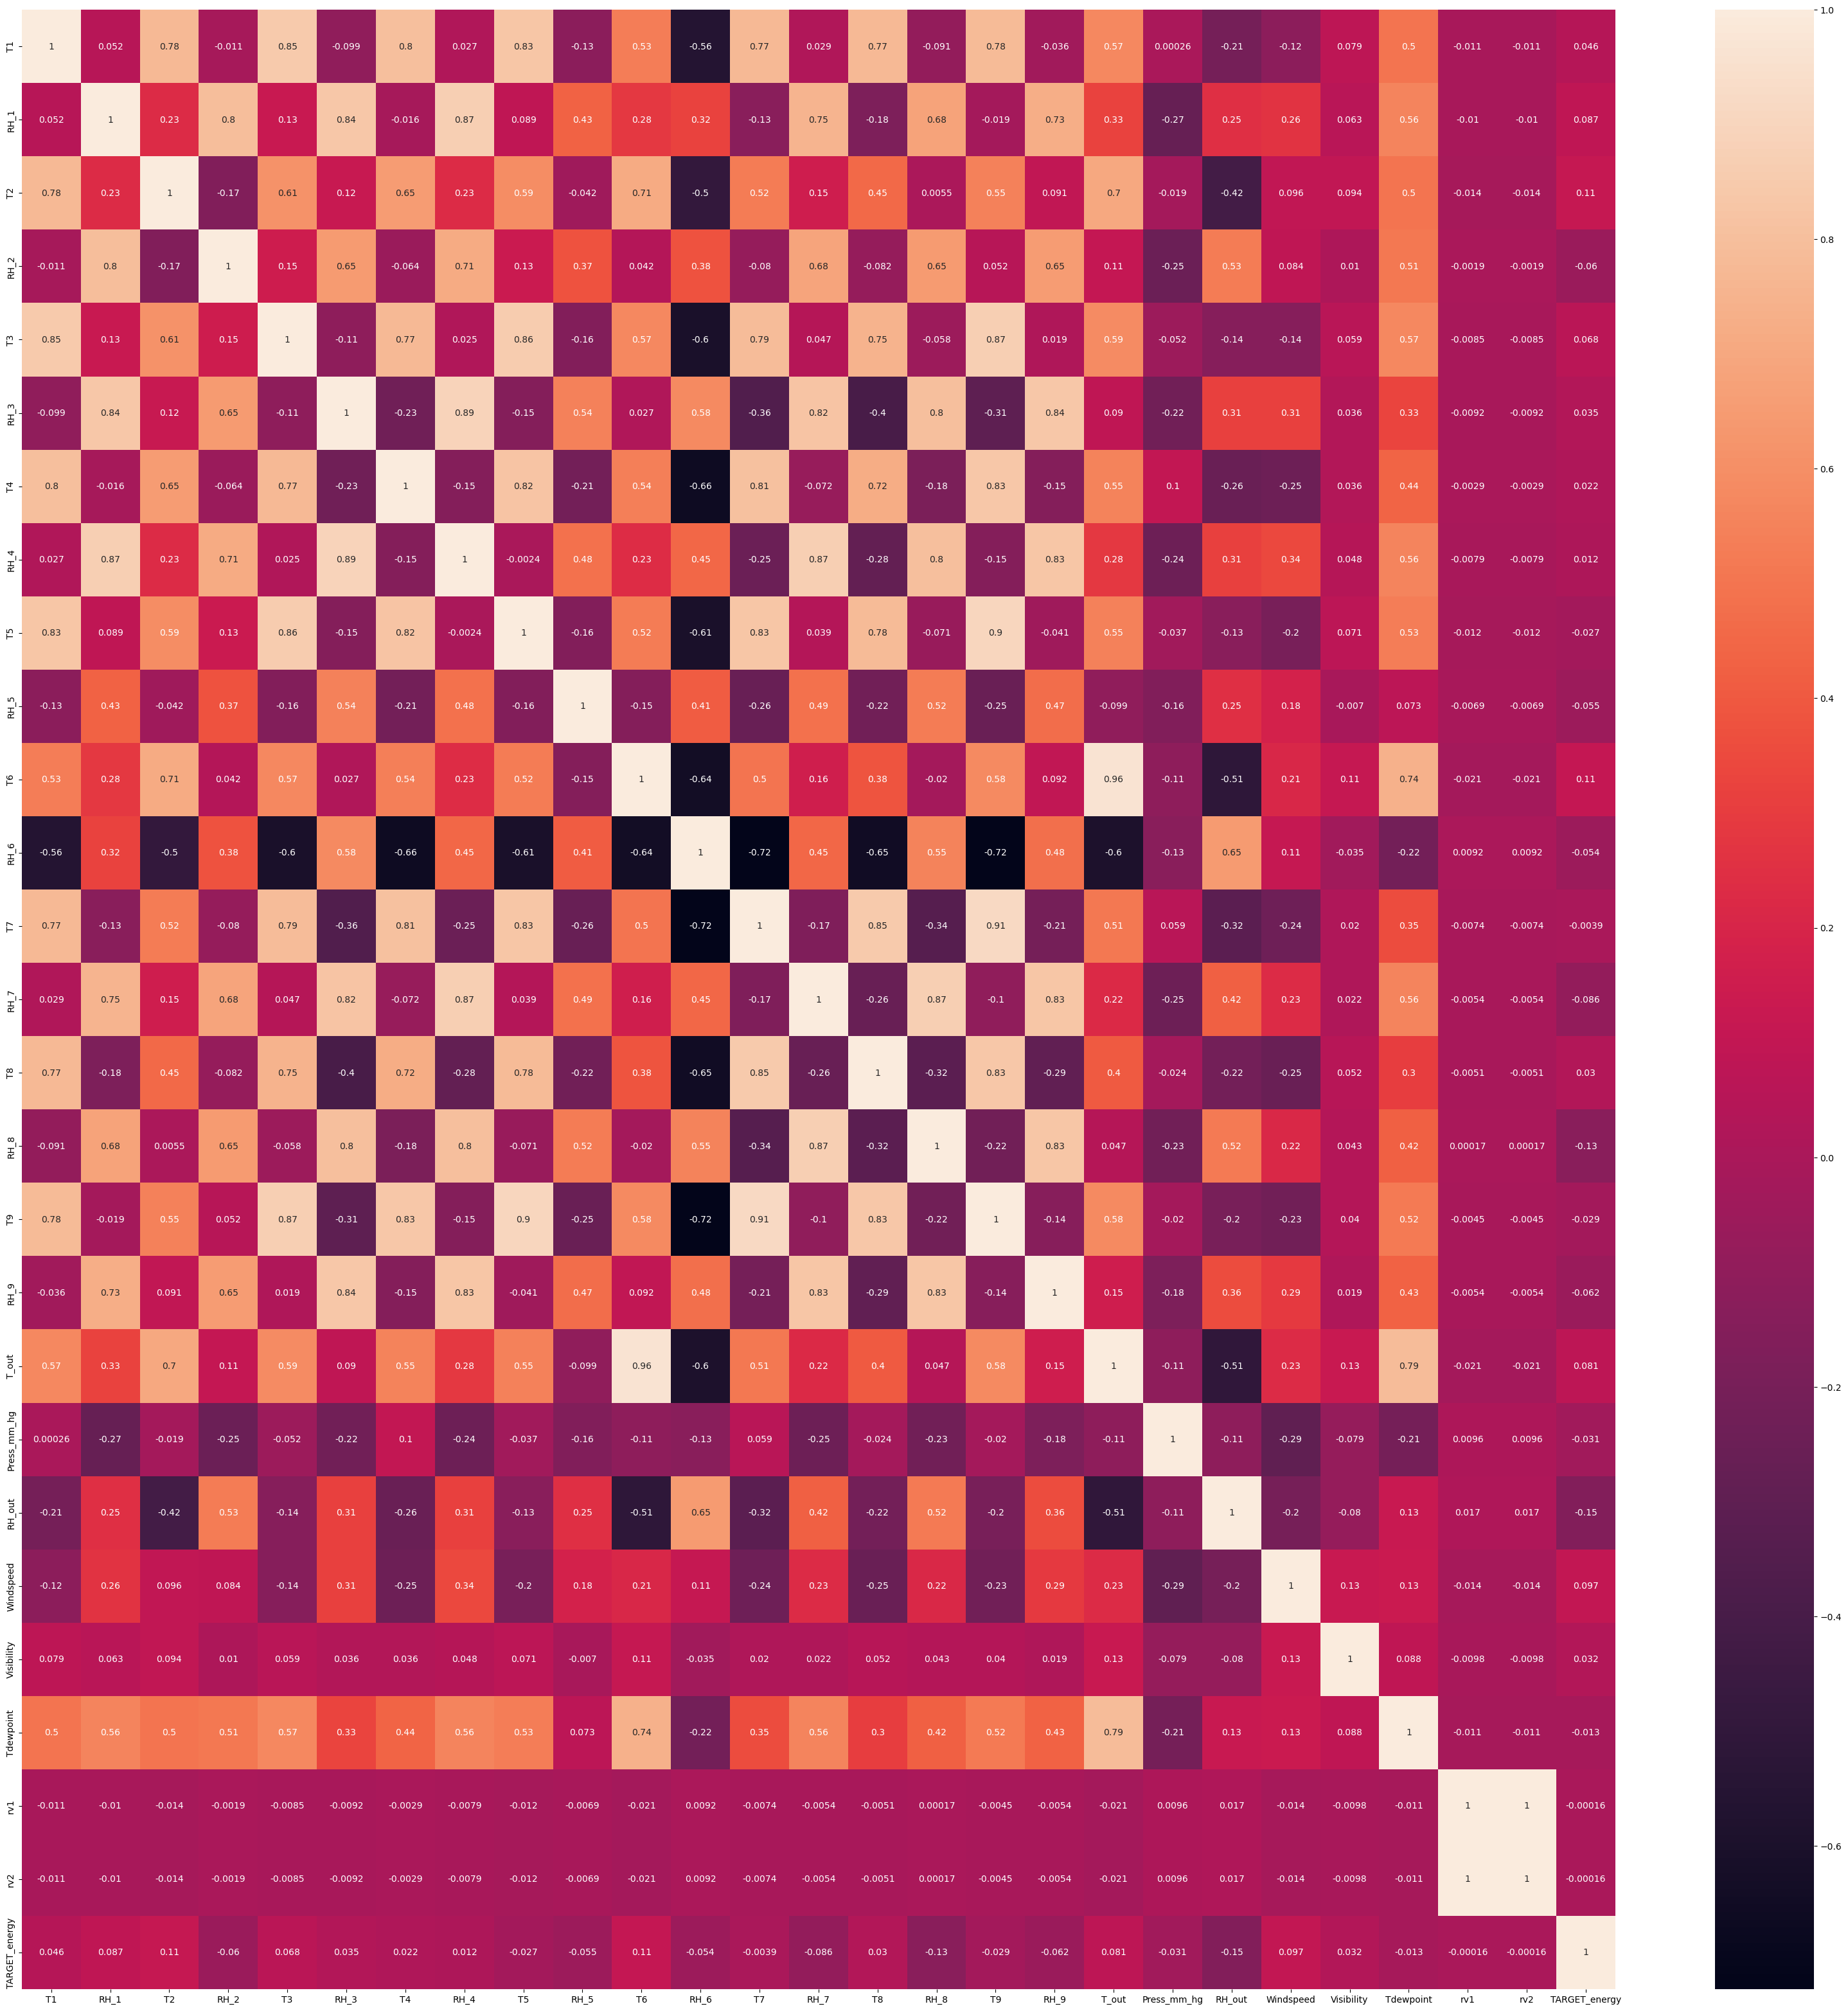

In [11]:
import seaborn as sns
plt.figure(figsize=(40,40))
correlation_table = df.corr()
sns.heatmap(correlation_table,annot=True)
plt.show()

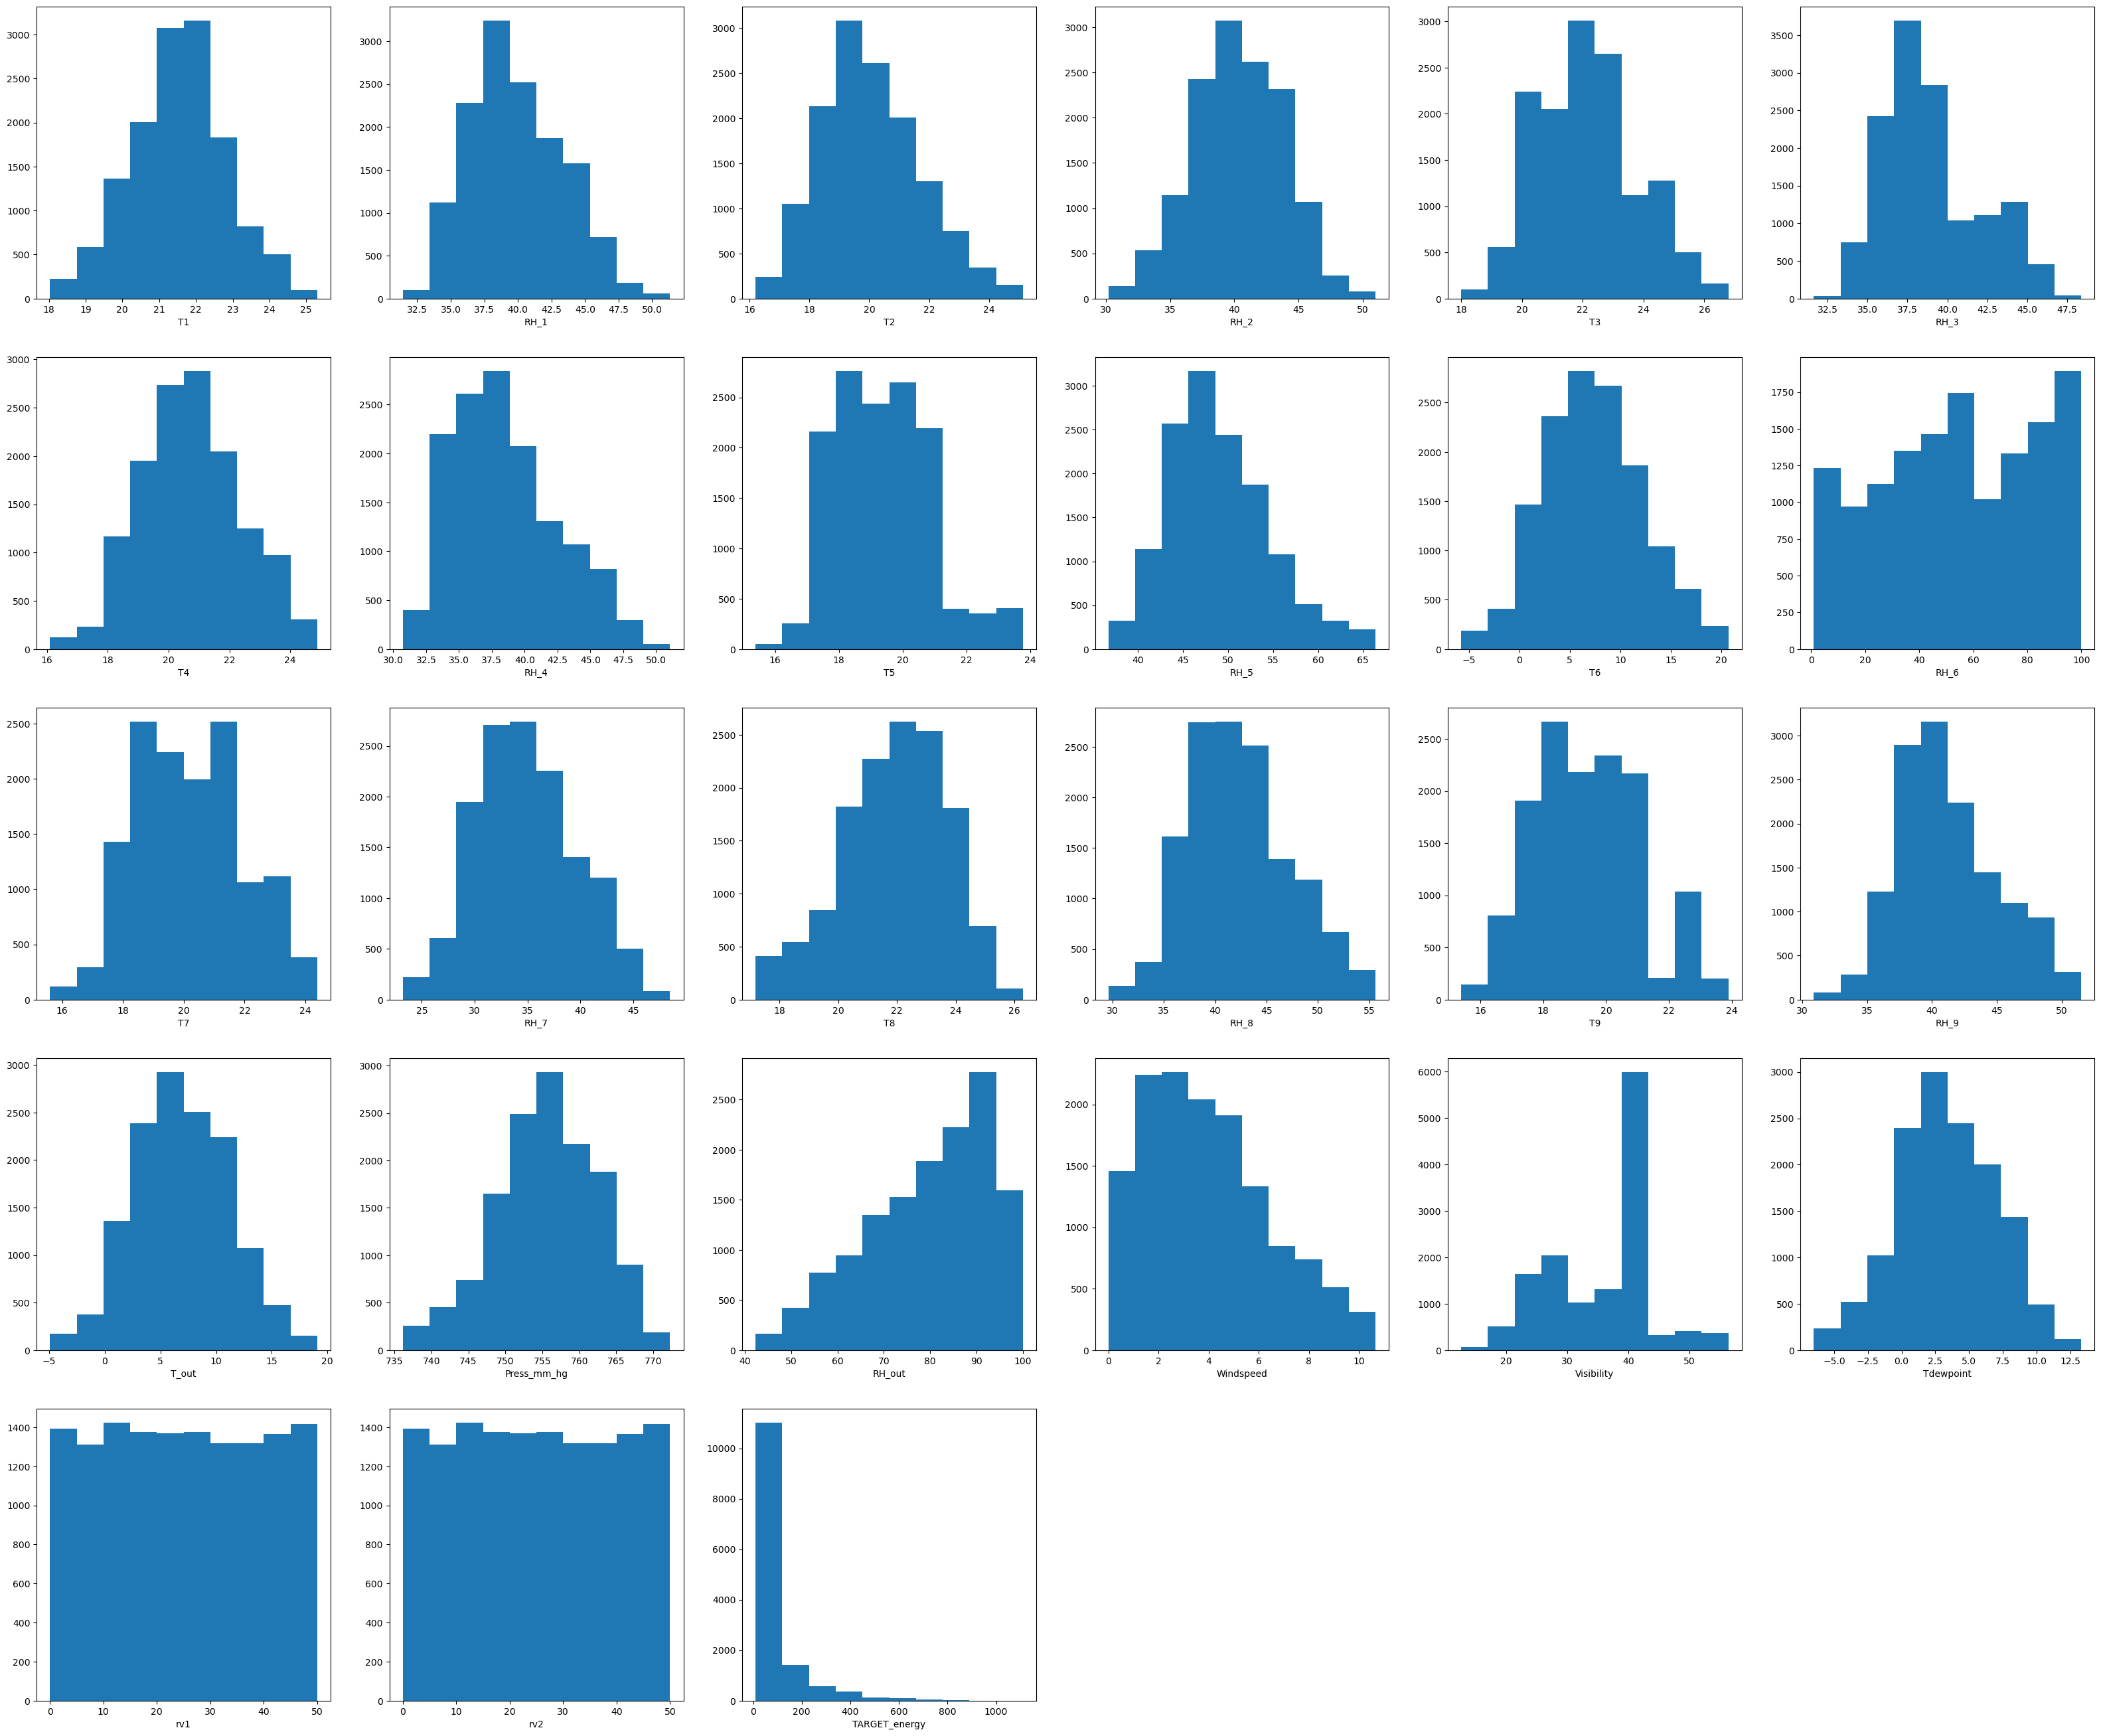

In [12]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns):
    plt.subplot(6,6,i+1)  
    plt.hist(df[col])
    plt.xlabel(col)
plt.show()

In [13]:
df = df.reset_index()

print(df['date'].dtype)

df.sort_values(by=['date'])

datetime64[ns]


,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
10507,2016-01-11 22:40:00,21.600000,44.360000,21.000,43.833333,20.5000,45.730000,20.596667,47.223333,19.2000,...,44.433333,5.800000,736.133333,87.333333,6.666667,40.000000,3.766667,41.368666,41.368666,260
11947,2016-01-11 22:50:00,21.600000,44.200000,21.000,43.700000,20.5000,45.590000,20.996667,47.030000,19.2225,...,44.500000,5.850000,736.216667,87.166667,6.833333,40.000000,3.783333,33.423337,33.423337,80
9749,2016-01-11 23:00:00,21.600000,44.200000,21.000,43.590000,20.4175,45.545000,21.166667,46.526667,19.2900,...,44.500000,5.900000,736.300000,87.000000,7.000000,40.000000,3.800000,39.711993,39.711993,80
4549,2016-01-11 23:10:00,21.600000,44.200000,21.000,43.590000,20.3900,45.663333,21.033333,46.400000,19.2900,...,45.066667,5.800000,736.400000,87.833333,6.833333,37.000000,3.850000,5.397181,5.397181,80
3955,2016-01-11 23:20:00,21.600000,44.200000,21.000,43.700000,20.2900,45.730000,20.963333,46.433333,19.2900,...,45.260000,5.700000,736.500000,88.666667,6.666667,34.000000,3.900000,36.185547,36.185547,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10058,2016-05-27 07:30:00,23.890000,45.500000,22.390,46.290000,25.7300,39.560000,24.230000,42.626667,22.3900,...,46.400000,13.800000,755.800000,87.500000,1.500000,51.500000,11.700000,37.038056,37.038056,190
7562,2016-05-27 07:40:00,23.963333,45.500000,22.390,46.290000,25.7300,39.700000,24.290000,42.700000,22.3900,...,46.326667,13.900000,755.800000,87.000000,1.666667,52.666667,11.700000,45.659775,45.659775,130
1290,2016-05-27 07:50:00,24.000000,45.500000,22.500,46.400000,25.7900,39.700000,24.290000,42.730000,22.3900,...,46.426667,14.000000,755.800000,86.500000,1.833333,53.833333,11.700000,33.925615,33.925615,180
9776,2016-05-27 08:00:00,24.000000,45.500000,22.470,46.382857,25.7000,39.900000,24.290000,42.790000,22.3900,...,46.566667,14.100000,755.800000,86.000000,2.000000,55.000000,11.700000,32.084907,32.084907,360


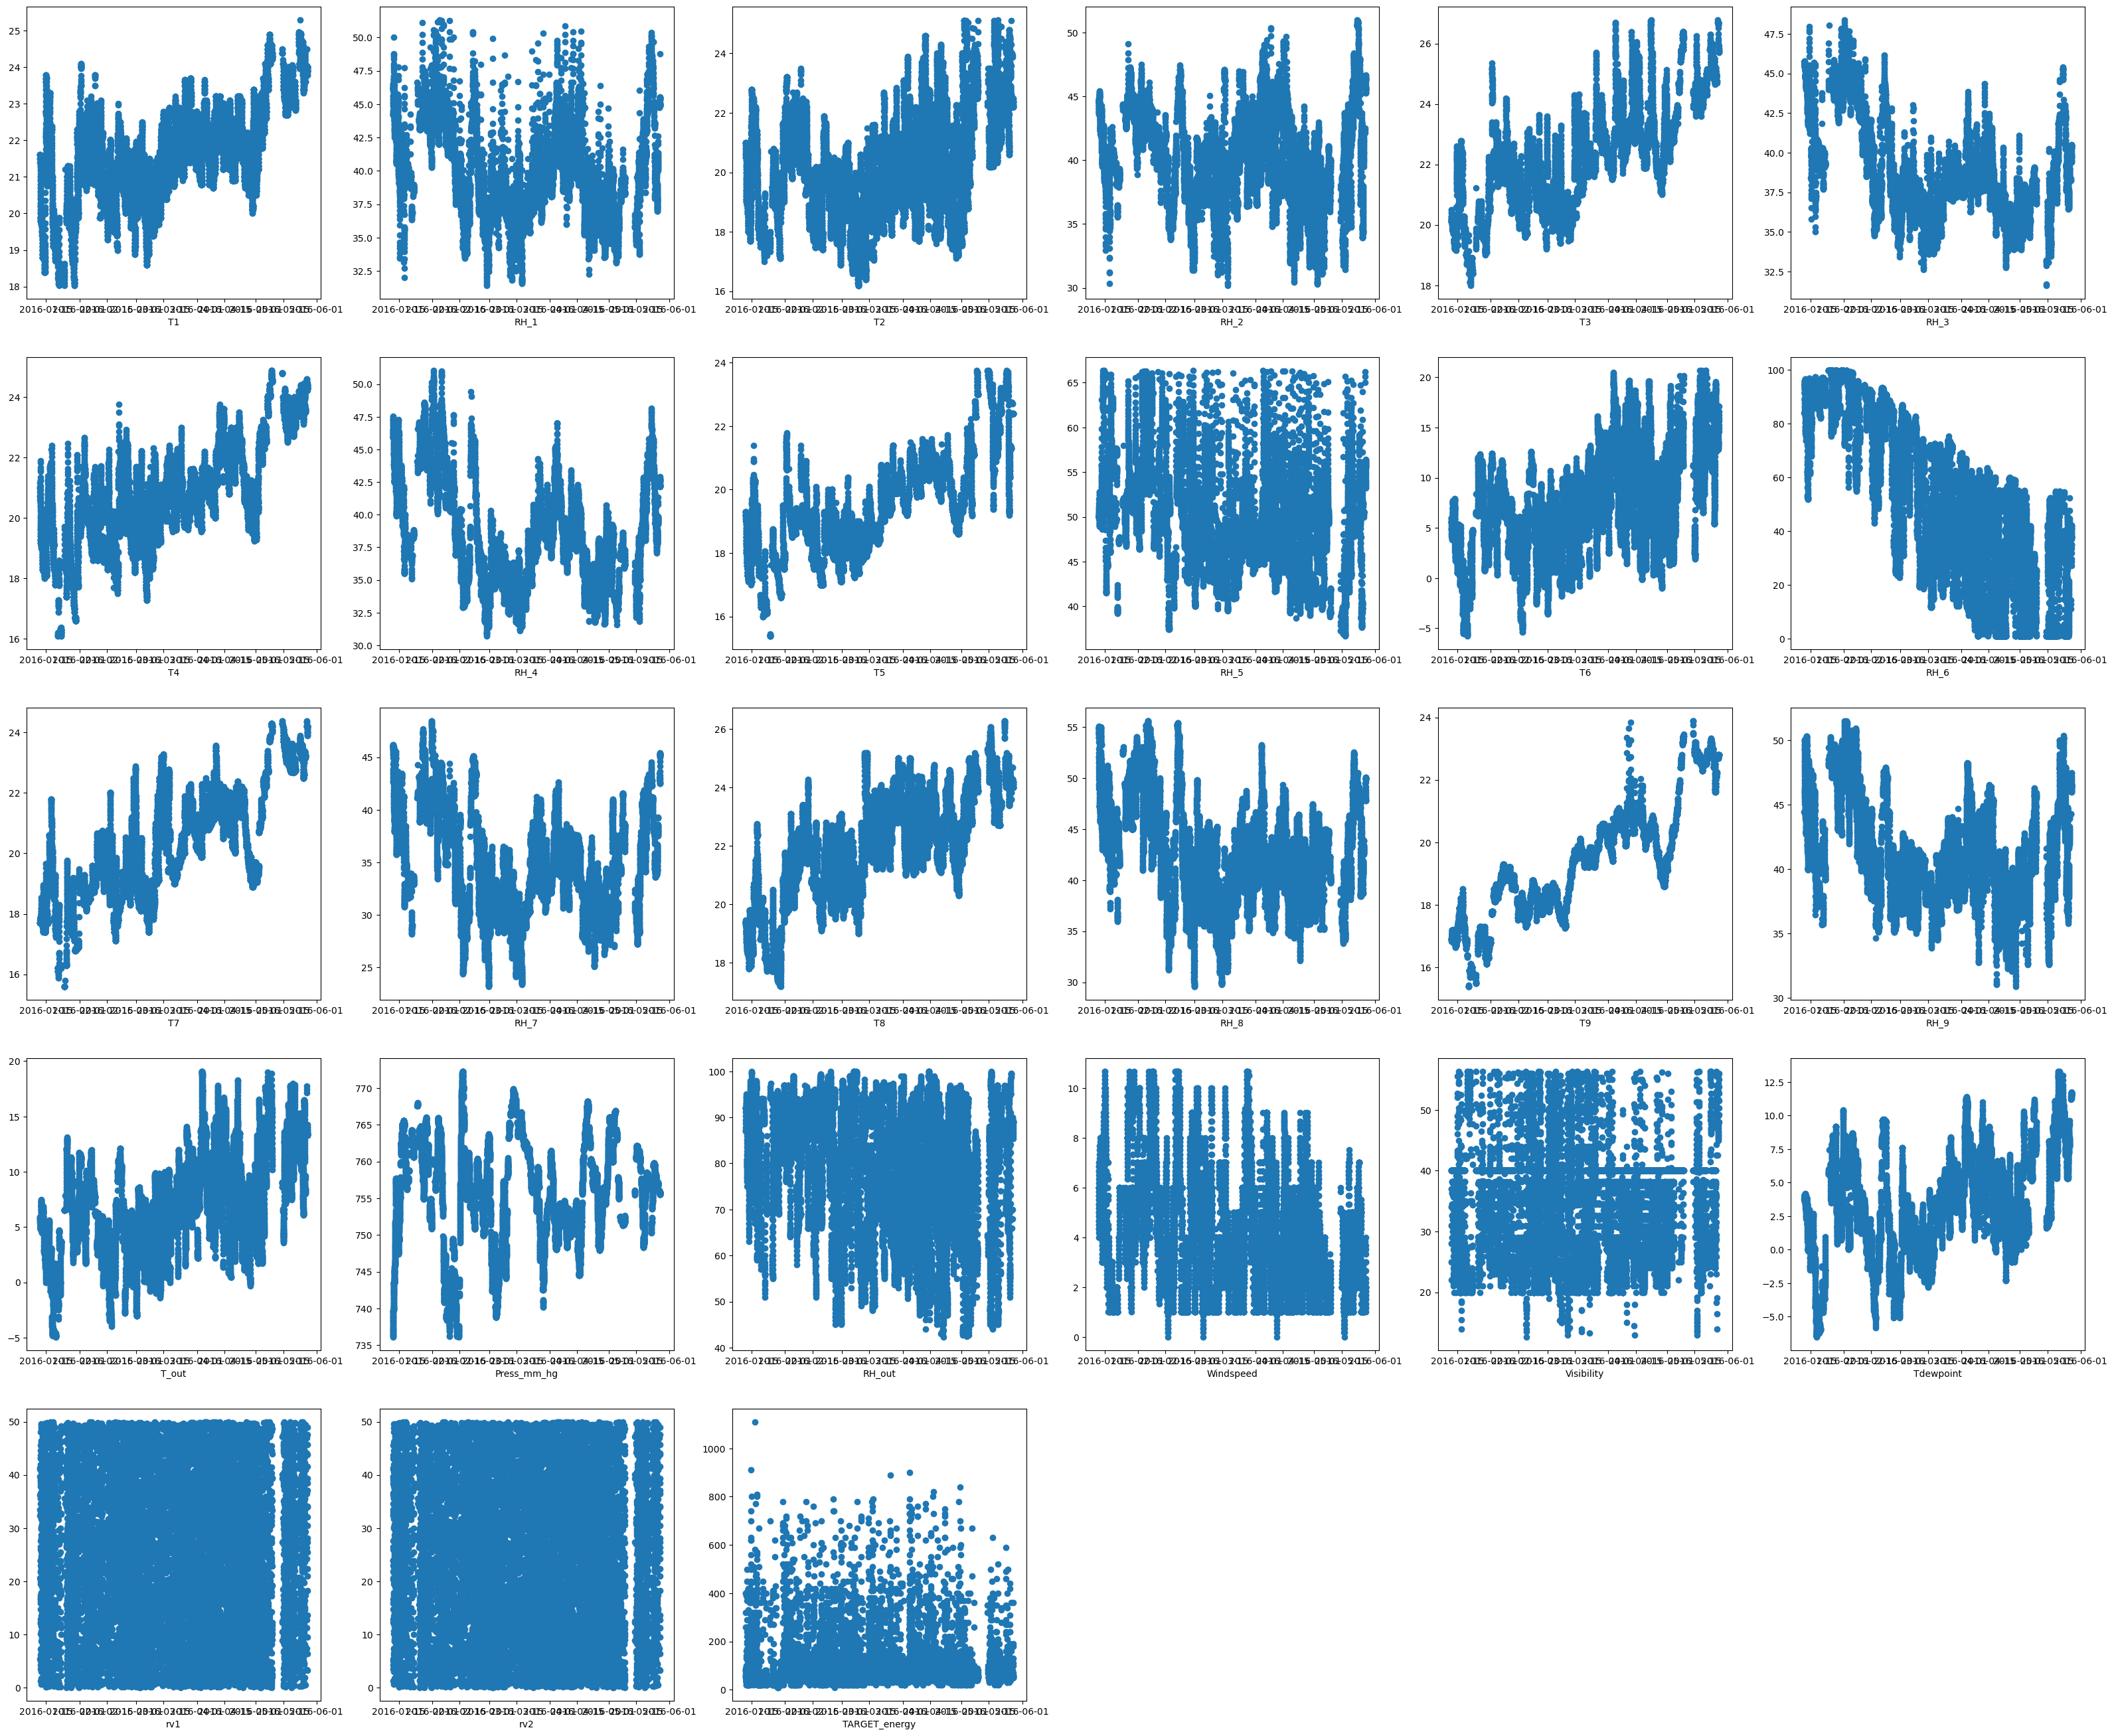

In [14]:
plt.figure(figsize=(40,40))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(6,6,i+1)  
    plt.scatter(df['date'], df[col])
    plt.xlabel(col)
plt.show()

In [16]:
df = df.drop(['RH_out','rv1','rv2','Visibility','RH_5'],axis=1)

In [17]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df, random_state = 3,  shuffle=True, test_size = 0.2)

In [18]:
print(training_data.shape)
print(testing_data.shape)

(10936, 23)
(2734, 23)


In [19]:
training_set, validation_set = train_test_split(training_data, random_state = 3,  shuffle=True, test_size = 0.2)
print(training_set.shape)
print(validation_set.shape)

(8748, 23)
(2188, 23)


In [2]:
!pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/c4/ef/c7a0349eec94535d37498a06c033dab2793fdfd7751d461ea3a47f4d23af/prophet-1.1.5-py3-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/75/06/4df55e1b7b112d183f65db9503bff189e97179b256e1ea450a3c365241e0/importlib_resources-6.4.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 2.7 MB/s eta 0:00:0000:0100:01


In [8]:
import xgboost